# Final project
### Siberian Weather Stats


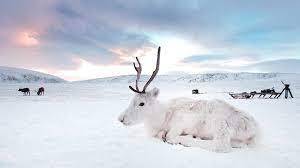

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [18]:
url = 'https://raw.githubusercontent.com/eyalmosko/Siberian-Weather-Stats/main/weather.csv'
df_weather = pd.read_csv(url, decimal=',')
df_weather

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change
0,468.0,0.0,24.9,31.0,100.0,4.0,0.0,993.8,4.0,-3.0,-0.3,-0.4
1,140.0,0.0,27.9,22.0,20.0,1.0,0.0,1004.1,4.0,-2.0,0.6,-1.0
2,464.0,0.0,25.6,28.0,20.0,2.0,1.0,1001.2,4.0,-7.0,-1.8,-0.3
3,467.0,0.0,26.7,26.0,100.0,3.0,0.0,992.3,4.0,-1.0,1.2,-1.3
4,138.0,0.0,29.1,22.0,20.0,1.0,0.0,1001.3,4.0,-2.0,2.5,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1434,474.0,0.1,6.4,95.0,4.0,1.0,3.0,999.9,4.0,-1.0,5.9,1.5
1435,65.0,0.0,6.4,93.0,10.0,4.0,3.0,983.9,4.0,-1.0,5.2,3.1
1436,159.0,0.1,8.5,83.0,10.0,2.0,1.0,969.7,4.0,1.0,1.4,1.9
1437,99.0,0.1,7.5,91.0,10.0,3.0,3.0,995.4,4.0,-4.0,2.7,1.7


### :weather הסבר על עמודה 

0 - Partly Cloudy (מעונן חלקית)

1 – Cloudy  (מעונן)

2 – Clear   (בהיר) 

3 – Rain  (גשום)

4 - Strong Wind    (רוח חזקה)

5 – Fog    (ערפל)

6 – Mist   (אובך)

7 – Snow   (שלג)

8 – Storm   (סערה)


In [31]:
df_weather.isnull().sum().sort_values(ascending=False)

pressure_change    0
temp_change        0
wl_change          0
fire               0
pressure           0
weather            0
wind               0
visibility         0
humidity           0
temperature        0
precipitation      0
water_level        0
dtype: int64

In [4]:
df_weather.dtypes

water_level        float64
precipitation      float64
temperature        float64
humidity           float64
visibility         float64
wind               float64
weather            float64
pressure           float64
fire               float64
wl_change          float64
temp_change        float64
pressure_change    float64
dtype: object

בדקנו שאין מידע חסר ושכל הנתונים הם מאותו הסוג

In [32]:
df_weather.pivot_table(['temperature','visibility' ],'weather') 

,temperature,visibility
weather,,
0.0,15.654701,39.358974
1.0,13.498871,37.038375
2.0,13.223767,38.699552
3.0,13.626733,22.475248
4.0,17.954082,31.204082
5.0,7.365000,16.150000
6.0,7.461765,4.117647
7.0,1.594118,14.470588
8.0,15.466667,24.000000


יצרנו טבלה שמחשבת ממוצע של עמודות מסויימות לפי עמודה אחרת,במקרה שלנו 'טמפרטורה' ו'ראות ' לפי 'מזג אויר'.  לא ראינו קשר בין הטמפרטורה לראות. אבל, ראינו קשר בין "סוג" מזג האויר לראות. ולכן נראה את הנתונים הללו בצורה ברורה יותר באיור הבא.  

<AxesSubplot:xlabel='weather', ylabel='visibility'>

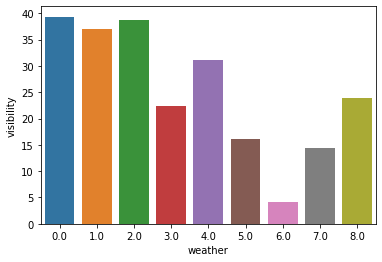

In [44]:
sns.barplot(x='weather', y='visibility', data=df_weather, ci=None)

מראה את הקשר בין משתנה מספרי למשתנה קטגורי barplot

ניסינו לחפש קשר מעניין בין הראות לבין הטמפרטורה תחת הקטגוריה של מזג האוויר אך לא מצאנו משהו מובהק אבל ראינו שדווקא בעמודה של אובך(מספר 6) יש משהו מעניין.

ניתן לראות בגרף שכשמזג האוויר אביך הראות היא הנמוכה ביותר לעומת מזג אוויר מעונן חלקית שבו הראות הטובה ביותר

<AxesSubplot:>

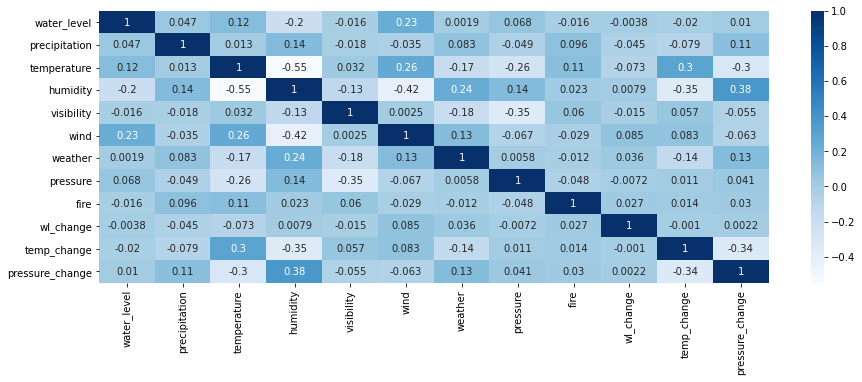

In [50]:
correlations = df_weather.corr()

fig = plt.figure(figsize=(15, 5))
sns.heatmap(correlations, annot=True, cmap='Blues')

עשינו מפה של כל הקורולציות בדאטה שלנו וראינו שהקורולציה החזקה ביותר הם בין העמודות לחות ושינוי בלחץ

החלטנו להראות את קו הרגרסיה של עמודות אלה :

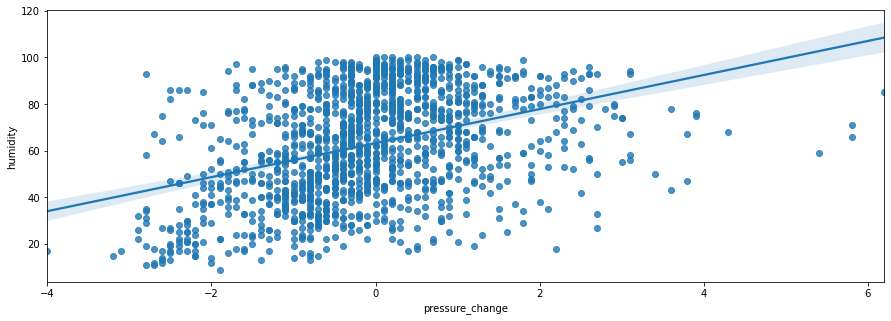

In [51]:
fig = plt.figure(figsize = (15,5))
sns.regplot(x='pressure_change', y='humidity', data=df_weather);

קו הרגרסיה מייצג את הקורלוציה בין השינוי בלחץ לבין הלחות. מכייון שיש התאמה גבוהה בין הנתונים אפשר לראות שהשיפוע חד מה שמראה על זווית טובה וקורלציה גבוהה.

<AxesSubplot:xlabel='weather', ylabel='count'>

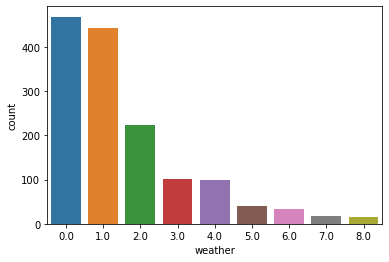

In [10]:
sns.countplot(x="weather", data=df_weather)

<AxesSubplot:ylabel='None'>

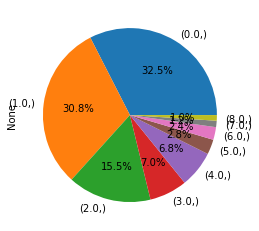

In [11]:
Data = df_weather[["weather"]]

Data.value_counts().plot.pie(autopct='%1.1f%%')

בגרפים הנ"ל ניתן לראות שמעונן חלקית הוא המזג אוויר שמתקיים הכי הרבה פעמים בשנה (מעל 400 פעמים)
אנחנו חושבים שבגרף עמודות רואים טוב יותר מבחינה ויזואלית מאשר בתרשים עוגה

ניתן לראות את זה גם בגרף הבא שזה הגיוני מבחינת הטמפרטורה:

<AxesSubplot:>

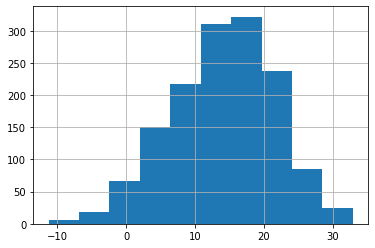

In [12]:
df_weather['temperature'].hist()

<AxesSubplot:xlabel='weather', ylabel='temperature'>

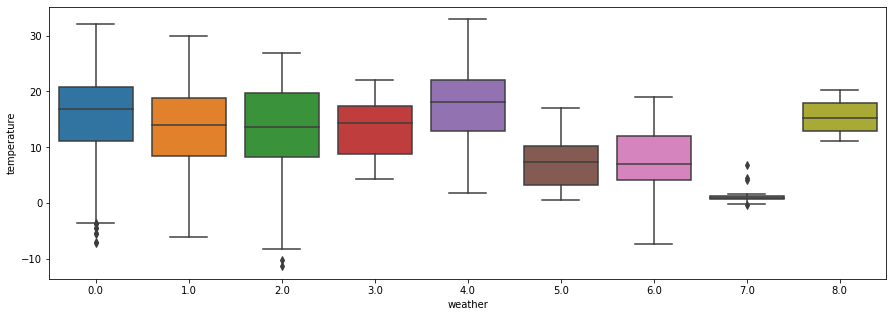

In [26]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='weather', y='temperature', data=df_weather)

In [14]:
print("The mean is:", df_weather['temperature'].mean())

The mean is: 14.036483669214757


האיור מראה את טווחי הטמפרטורה בכל "סוג" מזג אויר. ניתן לראות טווחים מגוונים. 
ממוצע הטמפרטורה לכל משך בדיקת הנתונים הוא בסביבות 14 מעלות.

The median is: 14.7


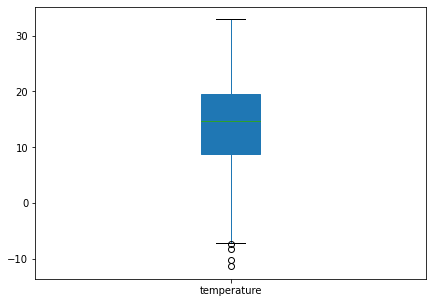

In [27]:
plt.figure(figsize=(7,5))
df_weather['temperature'].plot(kind='box', patch_artist=True);
print("The median is:", df_weather['temperature'].median())

חישבנו חציון לעמודה של הטמפרטורה, מה ששובר לנו את המחשבה שהולכת עם רבים מאיתנו שנים. סיביר לא מקום כל כך קר. אפילו כשמזג האויר "סוער", הטמפרטורה בו היא בין 10-20 מעלות. אין קשר חזק יותר מידי בין מזג האויר לטמפרטורה המשקפת אותו. ,